# Aqqar Dataset Project (Kaggle)

### The objective of this project:
To extract desired deals from the dataset. Then do simple analysis and visualization on the data using Tableau. 

### Quick overview on data cleaning rationale:
    - extract all 'For Rent' deals
    - seperating each city a part in a single df.
    - Boxplots for the prices for each city, it provides a good indication wheather the method we used for extracting 'For Rent' deals gave the desired results or not.
    - Considering the middle 50% of the data. Data between Q1 and Q3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from re import search
import seaborn as sns



In [2]:
file = pd.read_csv(r'C:\Users\ASUS\Desktop\ICS 104\Data Science Stuff\Aqqar\SA_Aqar.csv')

In [3]:
file.tail(20)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
3698,الخبر,حي الامواج,غرب,437,0,7,5,2,0,1,...,1,0,1,0,1,1,0,1,60000,للأيجار ڤيلا دورين و ملحق في حي الأصداف\n\nالم...
3699,الخبر,حي العليا,شمال,325,14,4,5,2,1,0,...,0,0,1,0,1,1,0,0,65000,للإيجار دبلوكس متصل مرتب جداً باركيه ومكيفات ر...
3700,الخبر,حي الحزام الاخضر,جنوب,400,4,4,5,2,1,1,...,1,0,0,0,1,1,0,0,140000,٤غرف نوم منهم غرفتين ماستر \nمجلس وصاله ومطبخ ...
3701,الخبر,حي الصواري,شرق,450,0,5,5,2,1,1,...,0,0,0,0,1,1,0,0,80000,دبلكس جديد مكيف للايجار\nالدور الارضي كراج سيا...
3702,الخبر,حي الراكة الجنوبية,شمال,200,4,6,5,2,1,1,...,0,1,1,0,1,1,0,0,85000,فيلا في الراكة الجنوبية على شارع ٤٠ مكونة من ص...
3703,الخبر,حي الصواري,شمال,312,0,5,5,3,0,0,...,1,0,1,0,1,1,0,0,45000,فيلا للايجار في العزيزية \nالسعر ٤٥ألف ريال \n...
3704,الخبر,حي التحلية,جنوب,300,0,5,5,3,1,1,...,0,0,1,0,1,0,0,0,75000,للايجار دوبلكس متصل بناء شخصي بحي التحلية بالخ...
3705,الخبر,حي البحيرة,غرب,375,0,4,4,2,1,1,...,0,1,1,0,1,1,0,0,80000,*عرض*\n*دبلكس للإيجار*\n\nالموقع / العزيزية حي...
3706,الخبر,حي الحزام الاخضر,جنوب شرقي,574,30,4,4,1,1,1,...,0,0,1,0,0,1,0,1,180000,فيلا للايجار او الاستثمار\n\nموقع مميز بالقرب ...
3707,الخبر,حي مدينة العمال,جنوب شرقي,348,30,5,5,3,1,0,...,0,0,1,0,0,1,0,0,65000,فيلا زواية على شارعين ومرممه بالكامل \nقريبة م...


In [4]:
file.shape

(3718, 24)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [6]:
riyadh = file[file['city'] == ' الرياض']
len(riyadh)/len(file)

0.258203335126412

In [7]:
jeddah = file[file['city'] == ' جدة']
len(jeddah)/len(file)

0.23883808499193115

In [8]:
dammam = file[file['city'] == ' الدمام']
len(dammam)/len(file)

0.24045185583647122

In [9]:
khobar = file[file['city'] == ' الخبر']
len(khobar)/len(file)

0.2625067240451856

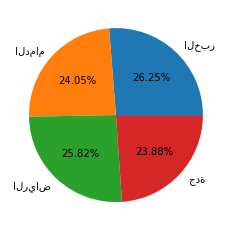

In [10]:
### percentage of each city in the dataset

import numpy as np
city = np.array(file['city'])
city_labels, city_counts = np.unique(file['city'],return_counts=True)


import matplotlib.pyplot as plt
plt.figure()
plt.pie(city_counts, labels = city_labels,autopct='%.2f%%') #autopct to format labels
plt.show()

In [11]:
file.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [12]:
file['details'][:50]

0     للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1     *** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2     فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3     فيلا للايجار        جديده لن تستخدم          ش...
4     فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...
5     الفيلا في حي الازدهار \nتتكون من مجلس رجال في ...
6            دبلكس مساحه ٢٥٠\nحي المهديه\nدفع كل ٦ شهور
7     للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
8     فيلا دبكلوكس علي شارعين قريب من الجامع والخدما...
9     New house for rent 150.000SR\nNew \n0500069102...
10    دوبلكس للايجار مساحة ٢٩٠م\nمؤثث بالكامل \nفي ح...
11    للايجار فيلا درج صاله بحى الصحافة \nعبارة عن م...
12    مخطط الخير\n\nللايجار او البيع فيلا زاوية\n\nا...
13    فيلا للايجار بحي العارض تتكون من ملحق مجلس مقل...
14    فله جديدة درج داخلي فخمه جدا حي راقي جميع المد...
15    الفيلا في حي الازدهار على شارعين متظاهرين شرقي...
16    حي النرجس بعد جامع السيف فلا تشطيب ⭐️⭐️⭐️⭐️⭐️\...
17    فيلا للايجار دورين درج جانبي \n\nفناء خارج

In [13]:
index = []
x=0
for ind in file.index:
    if search(' للايجار', str(file['details'][ind])):
        index.append(ind)
    elif search(' للايجار ', str(file['details'][ind])):
        index.append(ind)
    elif search(' للايجار', str(file['details'][ind])):
        index.append(ind)
    elif search('للإيجار ', str(file['details'][ind])):
        index.append(ind)
    elif search('إيجار ', str(file['details'][ind])):
        index.append(ind)
    elif search('للإيـجار ', str(file['details'][ind])):
        index.append(ind)
    elif search('لايجار ', str(file['details'][ind])):
        index.append(ind)
    elif search('ايجار ', str(file['details'][ind])):
        index.append(ind)
    
    


        
print(len(index))    

2101


In [14]:
rentindex=[]

for ind in file.index:
    if search('جار ', str(file['details'][ind])):
        rentindex.append(ind)

print(len(rentindex))

2193


In [15]:
forrent = file.iloc[rentindex,:]

In [16]:
forrent.city.unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [17]:
forrent[forrent.city == ' الدمام'].describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,291.283737,2.702422,5.283737,4.640138,2.318339,0.994810,0.906574,0.363322,0.716263,0.17128,0.451557,0.470588,0.081315,0.740484,0.001730,0.493080,0.809689,0.083045,0.081315,54277.681661
std,83.310318,3.649937,1.286826,0.872405,0.753301,0.071919,0.291280,0.481373,0.451201,0.37708,0.498079,0.499567,0.273555,0.438749,0.041595,0.500385,0.392887,0.276189,0.273555,21360.919388
min,125.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7500.000000
25%,250.000000,0.000000,4.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,35000.000000
50%,250.000000,0.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,55000.000000
75%,350.000000,5.000000,7.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,70000.000000
max,1200.000000,20.000000,7.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150000.000000


In [18]:
forrent[forrent.city == ' الخبر'].describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.0,461.000000,461.000000,461.0,461.000000,461.000000
mean,381.418655,6.268980,5.420824,4.776573,2.232104,0.685466,0.778742,0.334056,0.778742,0.013015,0.344902,0.553145,0.010846,0.991323,0.0,0.872017,0.785249,0.0,0.438178,74110.520607
std,126.435051,9.912294,1.091827,0.416995,0.639573,0.464834,0.415545,0.472172,0.415545,0.113462,0.475853,0.497708,0.103690,0.092845,0.0,0.334433,0.411095,0.0,0.496702,39618.281119
min,200.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,37000.000000
25%,300.000000,0.000000,5.000000,5.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.0,0.000000,55000.000000
50%,325.000000,0.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.0,0.000000,60000.000000
75%,437.000000,13.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,75000.000000
max,2226.000000,30.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,180000.000000


In [19]:
forrent[forrent.city == ' الرياض'].describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.00000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,378.750831,4.702658,4.777409,4.619601,1.900332,0.92691,0.888704,0.478405,0.852159,0.086379,0.488372,0.435216,0.079734,0.810631,0.034884,0.305648,0.842193,0.034884,0.209302,91218.825581
std,247.634374,7.850493,1.088568,0.682426,0.869161,0.26050,0.314759,0.499949,0.355237,0.281156,0.500280,0.496198,0.271107,0.392127,0.183638,0.461064,0.364863,0.183638,0.407149,67723.817829
min,140.000000,0.000000,1.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,260.000000,0.000000,4.000000,4.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,50000.000000
50%,320.000000,0.000000,5.000000,5.000000,2.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,80000.000000
75%,400.000000,6.000000,5.000000,5.000000,2.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100000.000000
max,3060.000000,36.000000,7.000000,5.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,700000.000000


In [20]:
forrent[forrent.city == ' جدة'].describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,565.253623,5.621377,4.914855,4.677536,2.657609,0.974638,0.766304,0.793478,0.766304,0.164855,0.577899,0.764493,0.423913,0.887681,0.099638,0.572464,0.864130,0.190217,0.092391,1.092029e+05
std,4032.401329,6.160566,1.061621,0.581945,0.945222,0.157366,0.423565,0.405176,0.423565,0.371386,0.494343,0.424700,0.494625,0.316045,0.299788,0.495170,0.342961,0.392829,0.289840,8.902463e+04
min,150.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,300.000000,0.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000e+04
50%,312.000000,3.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
75%,400.000000,9.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.500000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


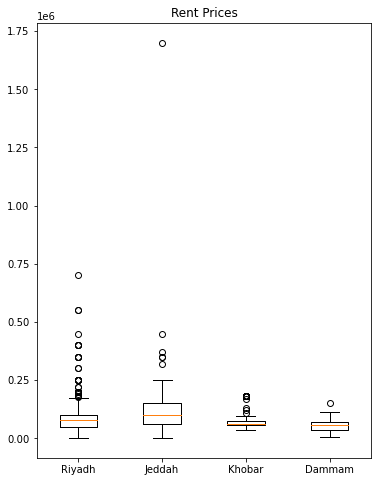

In [21]:
riyadh = forrent[forrent['city'] == ' الرياض']['price']
jeddah = forrent[forrent['city'] == ' جدة']['price']
khobar = forrent[forrent['city'] == ' الخبر']['price']
dammam = forrent[forrent['city'] == ' الدمام']['price']





import matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,8))
ax = fig.add_subplot(111) 
plt.boxplot([riyadh, jeddah, khobar, dammam]) 
plt.title('Rent Prices')
ax.set_xticklabels(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'])
plt.show()


In [22]:
Q3, Q1 = np.percentile(riyadh, [75 ,25])

print('For Riyadh Q3 =', Q3, 'and Q1 =', Q1)

For Riyadh Q3 = 100000.0 and Q1 = 50000.0


In [23]:
Q3, Q1 = np.percentile(jeddah, [75 ,25])

print('For Jeddah Q3 =', Q3, 'and Q1 =', Q1)

For Jeddah Q3 = 150000.0 and Q1 = 60000.0


In [24]:
Q3, Q1 = np.percentile(khobar, [75 ,25])

print('For Khobar Q3 =', Q3, 'and Q1 =', Q1)

For Khobar Q3 = 75000.0 and Q1 = 55000.0


In [25]:
Q3, Q1 = np.percentile(dammam, [75 ,25])

print('For Dammam Q3 =', Q3, 'and Q1 =', Q1)

For Dammam Q3 = 70000.0 and Q1 = 35000.0


In [26]:
riyadh = forrent[forrent['city'] == ' الرياض'].reset_index(drop=True)
jeddah = forrent[forrent['city'] == ' جدة'].reset_index(drop=True)
khobar = forrent[forrent['city'] == ' الخبر'].reset_index(drop=True)
dammam = forrent[forrent['city'] == ' الدمام'].reset_index(drop=True)



In [27]:
## length before 602

len(riyadh[riyadh.price > 100000.0])

riyadh = riyadh.drop(riyadh[riyadh.price > 100000].index)
len(riyadh)

len(riyadh[riyadh.price < 50000.0])

riyadh = riyadh.drop(riyadh[riyadh.price < 50000.0].index)
len(riyadh)

print('The max price:',riyadh.price.max())
print('The min price:',riyadh.price.min())

len(riyadh)

The max price: 100000
The min price: 50000


324

In [28]:
print('length before excluding Q3 and Q1', len(jeddah))
jeddah = jeddah.drop(jeddah[jeddah.price > 150000.0 ].index)
jeddah = jeddah.drop(jeddah[jeddah.price < 60000.0].index)


print('The max price:',jeddah.price.max())
print('The min price:',jeddah.price.min())

print('length after excluding Q3 and Q1', len(jeddah))


length before excluding Q3 and Q1 552
The max price: 150000
The min price: 60000
length after excluding Q3 and Q1 321


In [29]:
print('length before excluding Q3 and Q1', len(khobar))

print('length after excluding Q3 and Q1', len(jeddah))
khobar = khobar.drop(khobar[khobar.price > 75000.0].index)
khobar = khobar.drop(khobar[khobar.price < 55000.0].index)


print('The max price:',khobar.price.max())
print('The min price:',khobar.price.min())
print('length after excluding Q3 and Q1', len(khobar))

length before excluding Q3 and Q1 461
length after excluding Q3 and Q1 321
The max price: 75000
The min price: 55000
length after excluding Q3 and Q1 250


In [30]:
print('length before excluding Q3 and Q1', len(dammam))


dammam = dammam.drop(dammam[dammam.price > 70000.0 ].index)
dammam = dammam.drop(dammam[dammam.price < 35000.0].index)


print('The max price:',dammam.price.max())
print('The min price:',dammam.price.min())
print('length after excluding Q3 and Q1', len(dammam))


length before excluding Q3 and Q1 578
The max price: 70000
The min price: 35000
length after excluding Q3 and Q1 368


The mean prices of rent houses in Riyadh 76333
The mean prices of rent houses in Jeddah 100498
The mean prices of rent houses in Khobar 63060
The mean prices of rent houses in Dammam 50576


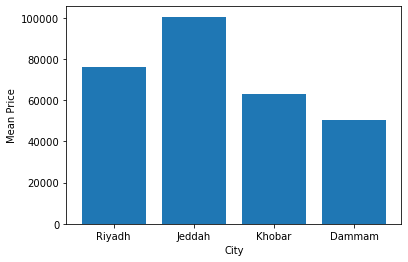

In [31]:
print('The mean prices of rent houses in Riyadh', round(riyadh['price'].mean()))
print('The mean prices of rent houses in Jeddah', round(jeddah['price'].mean()))
print('The mean prices of rent houses in Khobar', round(khobar['price'].mean()))
print('The mean prices of rent houses in Dammam', round(dammam.price.mean()))

cities = ['Riyadh', 'Jeddah', 'Khobar', 'Dammam']
meanprices = [riyadh.price.mean(), jeddah.price.mean(), khobar.price.mean(), dammam.price.mean()]



plt.bar(cities, meanprices)
plt.xlabel('City')
plt.ylabel('Mean Price')
plt.show()


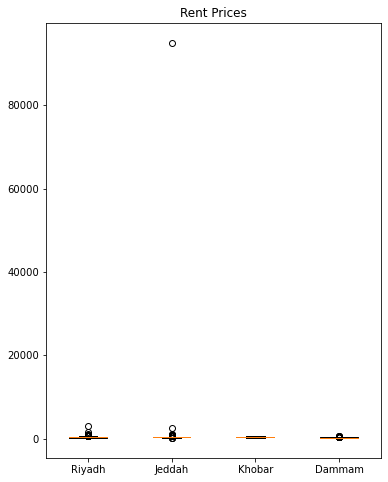

In [32]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,8))
ax = fig.add_subplot(111) 
plt.boxplot([riyadh['size'], jeddah['size'], khobar['size'], dammam['size']]) 
plt.title('Rent Prices')
ax.set_xticklabels(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'])
plt.show()


In [33]:
jeddah = jeddah.drop([27])


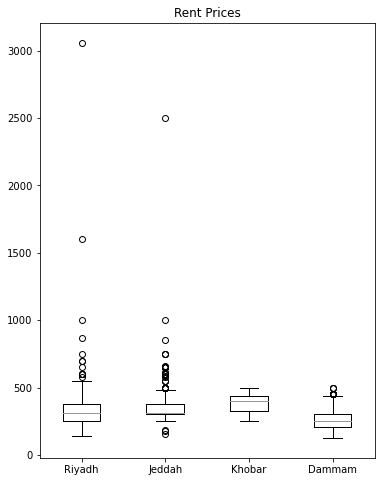

In [34]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,8))
ax = fig.add_subplot(111) 
plt.boxplot([riyadh['size'], jeddah['size'], khobar['size'], dammam['size']]) 
plt.title('Rent Prices')
ax.set_xticklabels(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'])
plt.show()

In [35]:
Q3, Q1 = np.percentile(riyadh['size'], [75 ,25])

print('For Riyadh(size) Q3 =', Q3, 'and Q1 =', Q1)

For Riyadh(size) Q3 = 375.0 and Q1 = 250.0


In [36]:
Q3, Q1 = np.percentile(jeddah['size'], [75 ,25])

print('For Jeddah(size) Q3 =', Q3, 'and Q1 =', Q1)

For Jeddah(size) Q3 = 375.0 and Q1 = 300.0


In [37]:
Q3, Q1 = np.percentile(khobar['size'], [75 ,25])

print('For khobar(size) Q3 =', Q3, 'and Q1 =', Q1)

For khobar(size) Q3 = 437.0 and Q1 = 325.0


In [38]:
Q3, Q1 = np.percentile(dammam['size'], [75 ,25])

print('For Dammam(size) Q3 =', Q3, 'and Q1 =', Q1)

For Dammam(size) Q3 = 300.0 and Q1 = 205.0


In [39]:
print('RIYADH')


print('length before excluding Q3 and Q1', len(riyadh))


riyadh = riyadh.drop(riyadh[riyadh['size'] > 375.0].index)
riyadh = riyadh.drop(riyadh[riyadh['size'] < 250.0].index)


print('The max size:',riyadh['size'].max())
print('The min size:',riyadh['size'].min())
print('length after excluding Q3 and Q1', len(riyadh))

RIYADH
length before excluding Q3 and Q1 324
The max size: 375
The min size: 250
length after excluding Q3 and Q1 221


In [40]:
print('JEDDAH')


print('length before excluding Q3 and Q1', len(jeddah))


jeddah = jeddah.drop(jeddah[jeddah['size'] > 375.0].index)
jeddah = jeddah.drop(jeddah[jeddah['size'] < 300.0].index)


print('The max price:',jeddah['size'].max())
print('The min price:',jeddah['size'].min())
print('length after excluding Q3 and Q1', len(jeddah))

JEDDAH
length before excluding Q3 and Q1 320
The max price: 375
The min price: 300
length after excluding Q3 and Q1 169


In [41]:
print('DAMMAM')


print('length before excluding Q3 and Q1', len(dammam))


dammam = dammam.drop(dammam[dammam['size'] > 300.0].index)
dammam = dammam.drop(dammam[dammam['size'] < 205.0].index)


print('The max price:',dammam['size'].max())
print('The min price:',dammam['size'].min())
print('length after excluding Q3 and Q1', len(dammam))

DAMMAM
length before excluding Q3 and Q1 368
The max price: 300
The min price: 205
length after excluding Q3 and Q1 255


In [42]:
print('KHOBAR')

print('length before excluding Q3 and Q1', len(khobar))


khobar = khobar.drop(khobar[khobar['size'] > 437.0].index)
khobar = khobar.drop(khobar[khobar['size'] < 325.0].index)


print('The max price:',khobar['size'].max())
print('The min price:',khobar['size'].min())
print('length after excluding Q3 and Q1', len(khobar))

KHOBAR
length before excluding Q3 and Q1 250
The max price: 437
The min price: 325
length after excluding Q3 and Q1 198


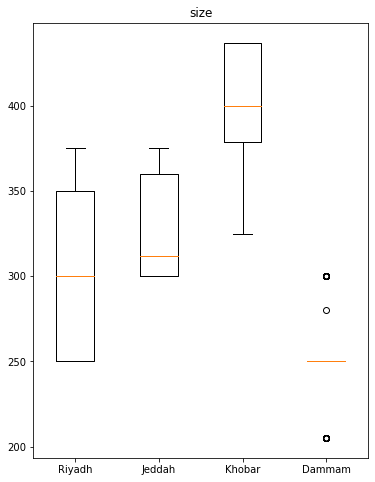

In [46]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize=(6,8))
ax = fig.add_subplot(111) 
plt.boxplot([riyadh['size'], jeddah['size'], khobar['size'], dammam['size']]) 
plt.title('size')
ax.set_xticklabels(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'])
plt.show()

The mean prices of rent houses in Riyadh 300
The mean prices of rent houses in Jeddah 329
The mean prices of rent houses in Khobar 400
The mean prices of rent houses in Dammam 253


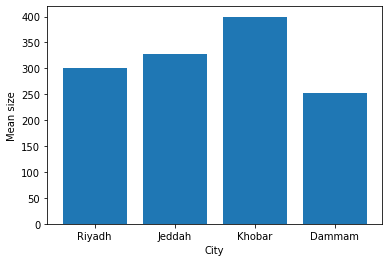

In [44]:
print('The mean prices of rent houses in Riyadh', round(riyadh['size'].mean()))
print('The mean prices of rent houses in Jeddah', round(jeddah['size'].mean()))
print('The mean prices of rent houses in Khobar', round(khobar['size'].mean()))
print('The mean prices of rent houses in Dammam', round(dammam['size'].mean()))

cities = ['Riyadh', 'Jeddah', 'Khobar', 'Dammam']
sizemean = [riyadh['size'].mean(), jeddah['size'].mean(), khobar['size'].mean(), dammam['size'].mean()]



plt.bar(cities, sizemean)
plt.xlabel('City')
plt.ylabel('Mean size')
plt.show()

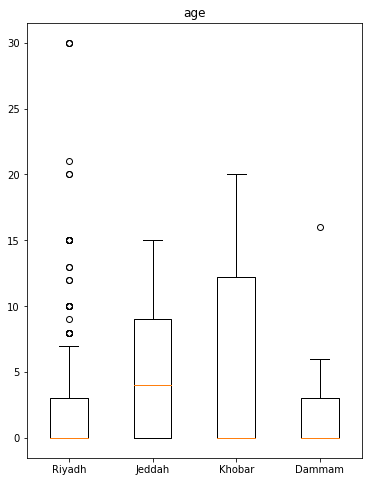

In [47]:
fig =plt.figure(figsize=(6,8))
ax = fig.add_subplot(111) 
plt.boxplot([riyadh['property_age'], jeddah['property_age'], khobar['property_age'], dammam['property_age']]) 
plt.title('age')
ax.set_xticklabels(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'])
plt.show()

The mean prices of rent houses in Riyadh 3
The mean prices of rent houses in Jeddah 5
The mean prices of rent houses in Khobar 4
The mean prices of rent houses in Dammam 2


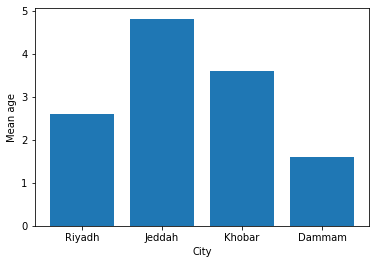

In [45]:
print('The mean prices of rent houses in Riyadh', round(riyadh['property_age'].mean()))
print('The mean prices of rent houses in Jeddah', round(jeddah['property_age'].mean()))
print('The mean prices of rent houses in Khobar', round(khobar['property_age'].mean()))
print('The mean prices of rent houses in Dammam', round(dammam['property_age'].mean()))

cities = ['Riyadh', 'Jeddah', 'Khobar', 'Dammam']
sizemean = [riyadh['property_age'].mean(), jeddah['property_age'].mean(), khobar['property_age'].mean(), dammam['property_age'].mean()]



plt.bar(cities, sizemean)
plt.xlabel('City')
plt.ylabel('Mean age')
plt.show()

The percentage of new properies in Riyadh is 0.6742081447963801
The percentage of new properies in Jeddah is 0.26627218934911245
The percentage of new properies in Riyadh is 0.7424242424242424
The percentage of new properies in Riyadh is 0.6078431372549019


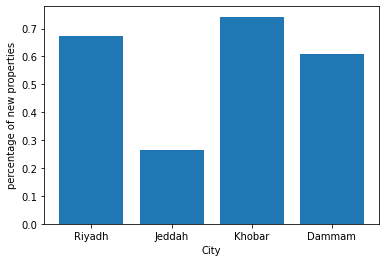

In [59]:
print('The percentage of new properies in Riyadh is', len(riyadh[riyadh['property_age'] == 0])/len(riyadh))
print('The percentage of new properies in Jeddah is', len(jeddah[jeddah['property_age'] == 0])/len(jeddah))
print('The percentage of new properies in Riyadh is', len(khobar[khobar['property_age'] == 0])/len(khobar))
print('The percentage of new properies in Riyadh is', len(dammam[dammam['property_age'] == 0])/len(dammam))


cities = ['Riyadh', 'Jeddah', 'Khobar', 'Dammam']
sizemean = [len(riyadh[riyadh['property_age'] == 0])/len(riyadh), len(jeddah[jeddah['property_age'] == 0])/len(jeddah), len(khobar[khobar['property_age'] == 0])/len(khobar),len(dammam[dammam['property_age'] == 0])/len(dammam)]



plt.bar(cities, sizemean)
plt.xlabel('City')
plt.ylabel('percentage of new properties')
plt.show()

In [79]:
print(len(riyadh)+len(jeddah)+len(khobar)+len(dammam))

sample = pd.concat([riyadh, jeddah, khobar, dammam])
sample.reset_index(drop=True)

843


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
2,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
3,الرياض,حي العارض,شمال,250,0,5,5,1,1,0,...,0,0,1,0,1,1,0,0,85000,== للايجار فيلا دبلكس راقية جدا وموقعها ممتاز ...
4,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,الدمام,حي ضاحية الملك فهد,شمال,250,0,5,5,3,1,0,...,0,0,0,0,0,0,0,0,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...
839,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
840,الدمام,حي الشعلة,جنوب,300,3,4,5,4,1,1,...,0,0,0,0,0,1,1,0,70000,للايجار فيلا شبه جديده حي الشعله \n٤ غرف نوم ...
841,الدمام,حي الاثير,شرق,205,0,3,2,1,1,1,...,0,1,0,0,0,0,0,0,60000,يقع مجمع العائلة في الدمام استراتيجيًا بالقرب ...


In [66]:
sample.to_csv('refinedAqqar.csv')

### the arabic characters is missed up in the csv file

In [80]:
len(sample['district'].unique())

70

In [93]:
# sample['city'].unique()

sample['city'] = sample['city'].replace(' الرياض', 'Riyadh')
sample['city'] = sample['city'].replace(' جدة', 'Jeddah')
sample['city'] = sample['city'].replace(' الخبر', 'Khobar')
sample['city'] = sample['city'].replace(' الدمام', 'Dammam')

sample.city.unique()

array(['Riyadh', 'Jeddah', 'Khobar', 'Dammam'], dtype=object)

In [95]:
sample.to_csv('refinedAqqar1.csv')

# Here is data analysis and visualization for the data, done using Tableau.

https://public.tableau.com/views/aqqar/Story1?:language=en-US&:display_count=n&:origin=viz_share_link
